# PROJECT-2 : Ratings of GUVI Courses


The following project is about Guvi Courses. The dataset for this project contains information
about Guvi courses in various categories, including course title, URL, price, number of
subscribers, number of reviews, number of lectures, course level, rating, content duration,
published timestamp, and subject. With this dataset, we can track the performance of courses
and uncover opportunities to generate revenue.

1. course_title : The title of the Guvi course. (String)
2. url : The URL of the Guvi course. (String)
3. price : The price of the Guvi course. (Float)
4. num_subscribers :The number of subscribers for the Guvi course. (Integer)
5. num_reviews : The number of reviews for the Guvi course.(Integer)
6. num_lectures : The number of lectures in the Guvi course.(Integer)
7. level : The level of the Guvi course. (String)
8. Rating : The rating of the Guvi course. (Float)
9. content_duration : The content duration of the Guvi course.(Float)
10. published_timestamp : The timestamp of when the Guvi course was published. (Datetime)
11. subject : The subject of the Guvi course. (String)

Design a regression model to predict the ratings given by the learners to the course.

### Importing Libraries and Dataset

Importing normal libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing classifier and ML-related libraries

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [98]:
df = pd.read_csv(r'C:\Users\aasth\OneDrive\Desktop\Guvi_Projects_Module_21\dataset\3.1-data-sheet-guvi-courses.csv')
df

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,2016-03-08T22:28:36Z,Subject: Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,1216340.0,Learn to Play Sweet Child of Mine,https://www.udemy.com/learn-to-play-sweet-chil...,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,2017-06-30T17:33:29Z,Musical Instruments
3676,1026762.0,Coaching Course: Rhythm Instruction for Music ...,https://www.udemy.com/coaching-bundle-rhythm-i...,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,2017-03-10T17:06:46Z,Musical Instruments
3677,1223240.0,Learn Pirates of the Caribbean by Ear on the P...,https://www.udemy.com/learn-pirates-of-the-car...,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,2017-05-22T17:14:43Z,Musical Instruments
3678,1224186.0,Learn to Play Piano Like a Pro - Easy Piano Co...,https://www.udemy.com/learn-to-play-piano-like...,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,2017-05-30T00:19:02Z,Musical Instruments


### Data Preprocessing

In [99]:
df.isnull().sum()

course_id              4
course_title           4
url                    4
price                  4
num_subscribers        4
num_reviews            4
num_lectures           4
level                  4
Rating                 4
content_duration       4
published_timestamp    4
subject                3
dtype: int64

In [100]:
df.dtypes

course_id              float64
course_title            object
url                     object
price                  float64
num_subscribers        float64
num_reviews            float64
num_lectures           float64
level                   object
Rating                 float64
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3676.0,675753.495103,343130.440299,8324.0,407474.00,687692.00,960814.00,1282064.0
price,3676.0,66.115343,61.056073,0.0,20.00,45.00,95.00,200.0
num_subscribers,3676.0,3199.260881,9486.582966,0.0,112.00,912.50,2558.00,268923.0
num_reviews,3676.0,156.309848,935.674518,0.0,4.00,18.00,67.00,27445.0
num_lectures,3676.0,40.129761,50.398507,0.0,15.00,25.00,46.00,779.0
Rating,3676.0,0.610868,0.334287,0.0,0.28,0.76,0.93,1.0
content_duration,3676.0,4.096137,6.054948,0.0,1.00,2.00,4.50,78.5


In [102]:
# Find no. of unique values
df.nunique()

course_id              3672
course_title           3663
url                    3672
price                    38
num_subscribers        2197
num_reviews             511
num_lectures            229
level                     4
Rating                  101
content_duration        105
published_timestamp    3672
subject                   4
dtype: int64

In [103]:
# Finding Numerical and Categorical columns
def find_num_cat_columns(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    return numerical_cols, categorical_cols

In [104]:
numerical_cols , categorical_cols = find_num_cat_columns(df)
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['course_id', 'price', 'num_subscribers', 'num_reviews', 'num_lectures', 'Rating', 'content_duration']
Categorical columns: ['course_title', 'url', 'level', 'published_timestamp', 'subject']


### Removing unwanted columns to predict Rating

In [105]:
for i in range(len(df.columns)):
    print(df.columns[i]+" : "+str(df[df.columns[i]].value_counts().to_list()))


course_id : [2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

We can see that the columns : "course_id", "course_title" , "url" and "published_timestamp" have very less value_counts().If a column has very low variability, meaning that one or a few values dominate the entire column, it might not provide much useful information. In such cases, we might decide to drop that column.

In [106]:
df.drop(['course_id','course_title','url','published_timestamp'],axis=1,inplace=True)

In [107]:
df.columns

Index(['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'Rating', 'content_duration', 'subject'],
      dtype='object')

### Handling Skewness

In [108]:
numerical_cols , categorical_cols = find_num_cat_columns(df)
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'Rating', 'content_duration']
Categorical columns: ['level', 'subject']


In [109]:
def plot(df, column):
    plt.subplot(1,3,1)
    plt.title(f'Hist & Violin Plot : {column}')
    sns.histplot(data=df, x=column, kde=True, bins=50)

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.legend(labels=["Skewness: %.2f"%(df[column].skew())])
    plt.show()

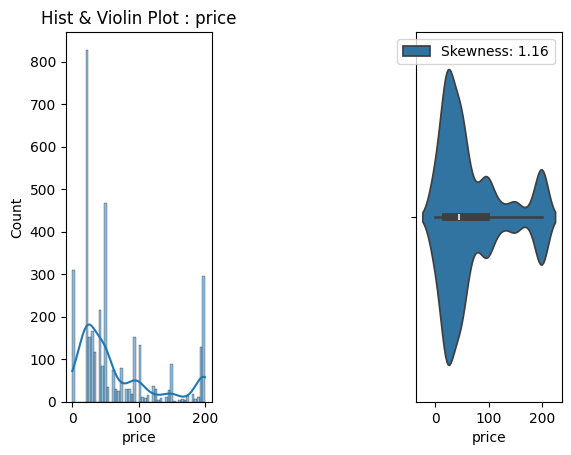

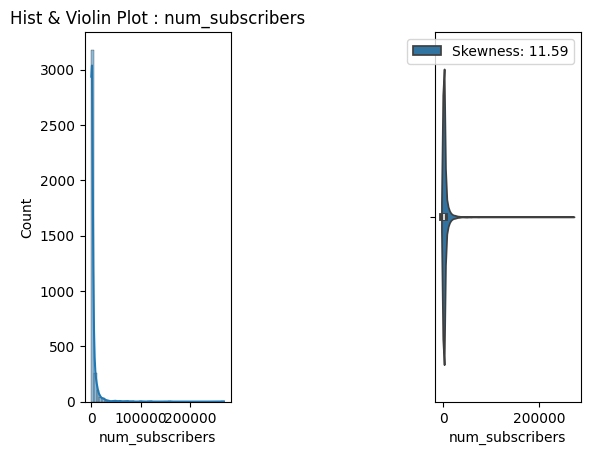

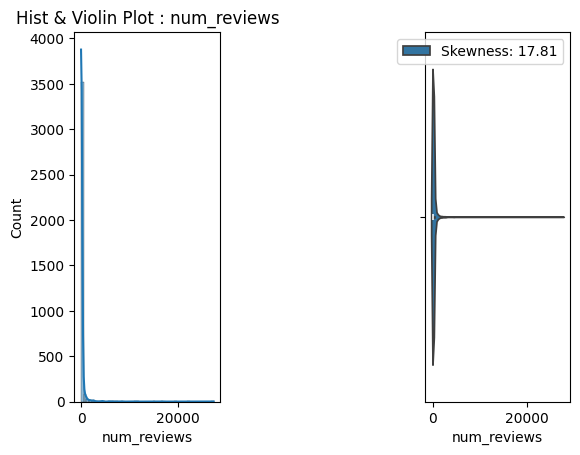

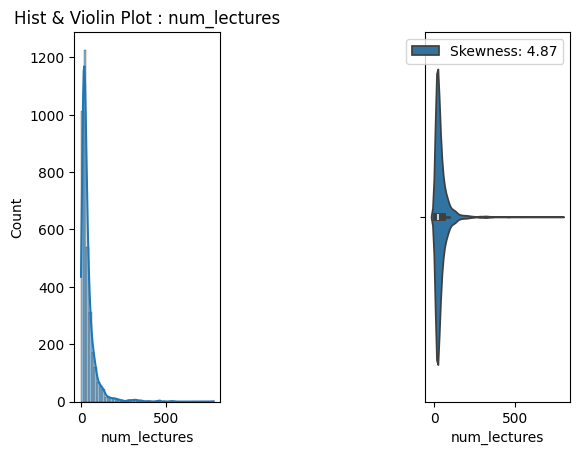

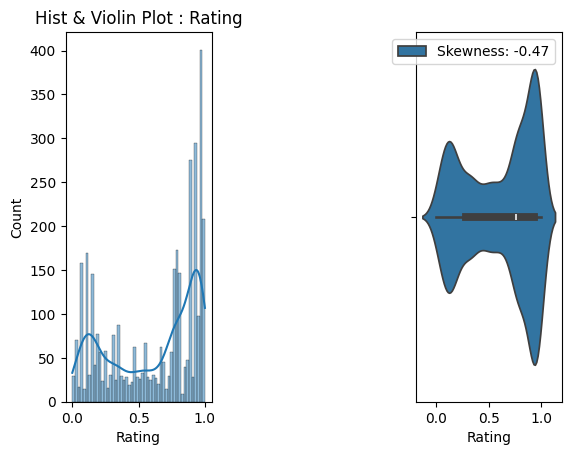

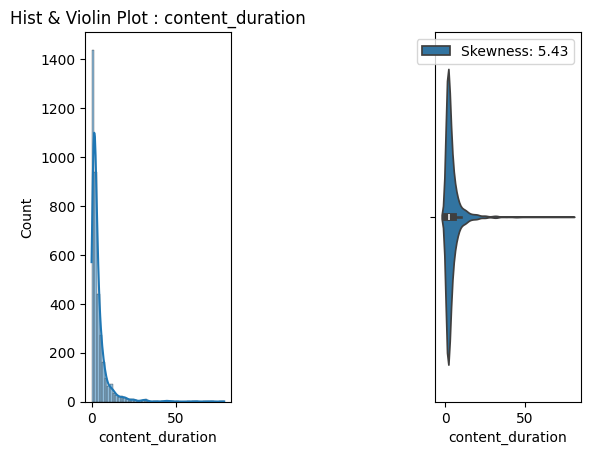

In [110]:
for col in numerical_cols:
    plot(df, col)

Using Log Transformation, removing the skewness

In [111]:
def add_log_transform(df,col):
    return np.log(df[df[col]>0][col])

Skewness values between -0.5 and 0.5 is considered to be roughly symmetric distribution, hence "rating" column can be ignored

In [112]:
df['price_log'] = add_log_transform(df,'price')
df['num_subscribers_log'] = add_log_transform(df,'num_subscribers')
df['num_reviews_log'] = add_log_transform(df,'num_reviews')
df['num_lectures_log'] = add_log_transform(df,'num_lectures')
df['content_duration_log'] = add_log_transform(df,'content_duration')
df

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,price_log,num_subscribers_log,num_reviews_log,num_lectures_log,content_duration_log
0,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,Subject: Web Development,NaN,12.502180,9.062884,3.806662,2.351375
1,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,Subject: Web Development,NaN,11.989340,5.631212,3.295837,1.252763
2,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,Subject: Web Development,5.298317,11.708361,10.219939,5.834811,3.761200
3,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,Subject: Web Development,NaN,11.697669,8.686767,3.401197,1.098612
4,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,Subject: Web Development,5.298317,11.648435,10.017352,5.717028,3.417727
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,Musical Instruments,2.995732,NaN,NaN,3.135494,0.405465
3676,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,Musical Instruments,4.828314,NaN,NaN,1.945910,-0.456758
3677,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,Musical Instruments,2.995732,NaN,NaN,1.791759,-0.628609
3678,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,Musical Instruments,3.555348,NaN,NaN,2.564949,-0.660357


In [114]:
# Dropping off the columns which are skewed
df1 = df.copy()
df1.drop(['price','num_subscribers','num_reviews','num_lectures','content_duration'],axis=1,inplace=True)
df1

,level,Rating,subject,price_log,num_subscribers_log,num_reviews_log,num_lectures_log,content_duration_log
0,Beginner Level,0.82,Subject: Web Development,NaN,12.502180,9.062884,3.806662,2.351375
1,Expert Level,0.69,Subject: Web Development,NaN,11.989340,5.631212,3.295837,1.252763
2,Beginner Level,0.89,Subject: Web Development,5.298317,11.708361,10.219939,5.834811,3.761200
3,All Levels,0.78,Subject: Web Development,NaN,11.697669,8.686767,3.401197,1.098612
4,Beginner Level,0.55,Subject: Web Development,5.298317,11.648435,10.017352,5.717028,3.417727
...,...,...,...,...,...,...,...,...
3675,All Levels,0.31,Musical Instruments,2.995732,NaN,NaN,3.135494,0.405465
3676,Beginner Level,0.06,Musical Instruments,4.828314,NaN,NaN,1.945910,-0.456758
3677,All Levels,0.08,Musical Instruments,2.995732,NaN,NaN,1.791759,-0.628609
3678,Beginner Level,0.78,Musical Instruments,3.555348,NaN,NaN,2.564949,-0.660357


In [116]:
numerical_cols,categorical_cols = find_num_cat_columns(df1)
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['Rating', 'price_log', 'num_subscribers_log', 'num_reviews_log', 'num_lectures_log', 'content_duration_log']
Categorical columns: ['level', 'subject']


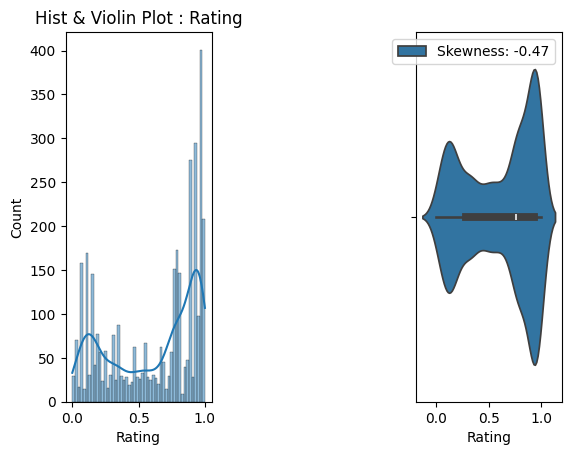

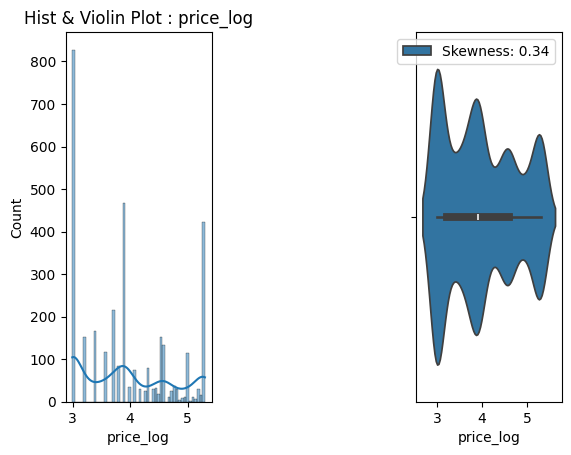

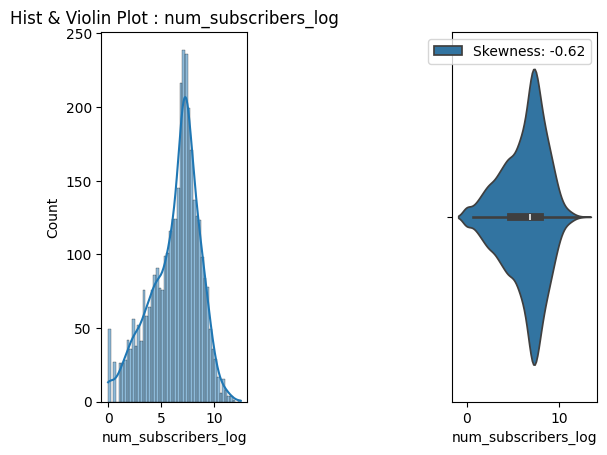

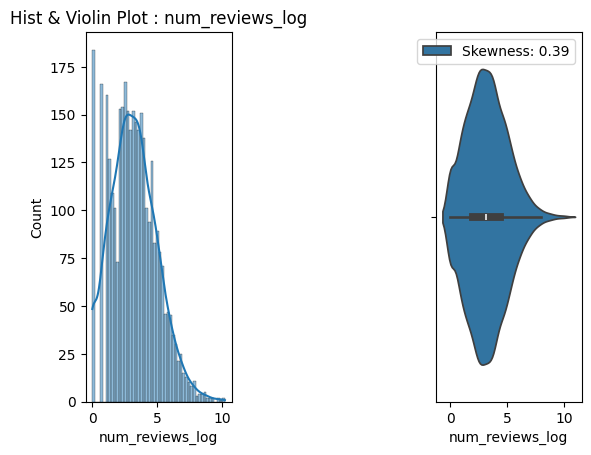

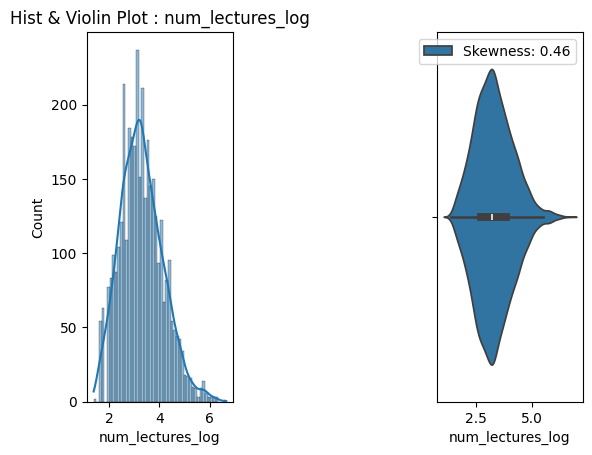

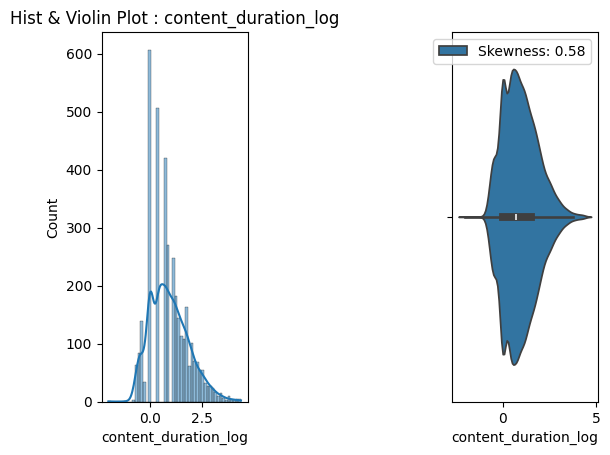

In [117]:
for col in numerical_cols:
    plot(df1, col)

### Handling the outliers

In [118]:
def find_outliers(df,col):
    for i in col:
        plt.figure(figsize=(4, 3))  
        sns.boxplot(data=df, x=i)
        plt.title(f'Boxplot of {i}')
        plt.xlabel(i)
        plt.show()

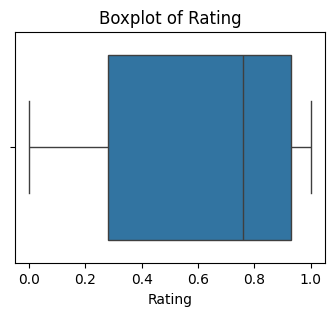

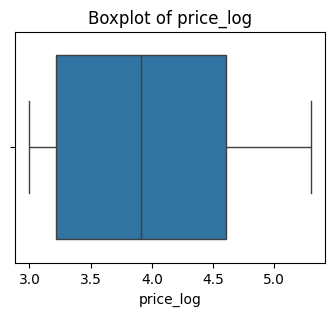

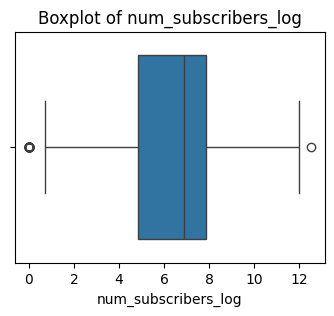

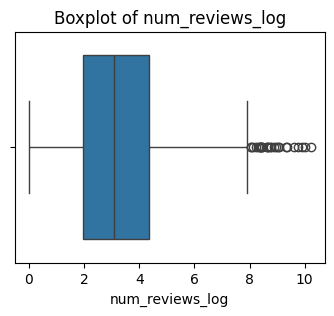

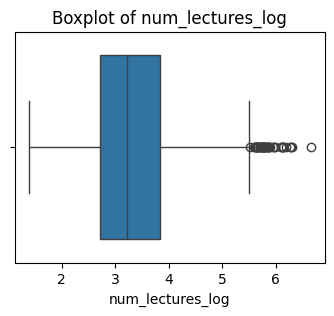

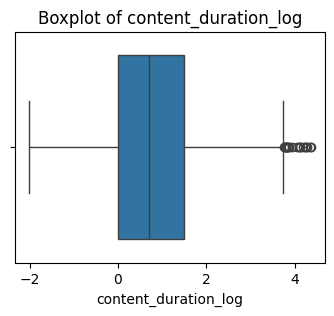

In [119]:
find_outliers(df1,numerical_cols)

We find that the columns "content_duration_log" , "num_lectures_log" , "num_reviews_log" , "num_subscribers_log" have outliers, so we need to handle them

### Handling Null Values

In [94]:
df.isnull().sum()

price                     4
num_subscribers           4
num_reviews               4
num_lectures              4
level                     4
Rating                    4
content_duration          4
subject                   3
price_log               315
num_subscribers_log      69
num_reviews_log         288
num_lectures_log          5
content_duration_log      5
dtype: int64